In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

import matplotlib.pyplot as plt

tf.config.list_physical_devices("GPU")

PATH = os.getcwd()
IMG_SIZE = (160, 160)


def get_val_dataset():
    validation_dir = os.path.join(PATH, "./test")
    validation_dataset = image_dataset_from_directory(
        validation_dir, shuffle=True, batch_size=203, image_size=IMG_SIZE
    )
    val_batches = tf.data.experimental.cardinality(validation_dataset)
    test_dataset = validation_dataset.take(val_batches // 5)
    validation_dataset = validation_dataset.skip(val_batches // 5)

    print(
        "Number of validation batches: %d"
        % tf.data.experimental.cardinality(validation_dataset)
    )
    AUTOTUNE = tf.data.AUTOTUNE
    validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
    return validation_dataset

In [2]:
model = tf.keras.models.load_model("./ResNet101_batch32.tf")
validation_dataset_prefetch = get_val_dataset()
loss, accuracy = model.evaluate(validation_dataset_prefetch)
print("Test accuracy :", accuracy)

Found 203 files belonging to 2 classes.
Number of validation batches: 1
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 11s 11s/step - loss: 0.9902 - accuracy: 0.7438
Test accuracy : 0.743842363357544


Found 203 files belonging to 2 classes.
0


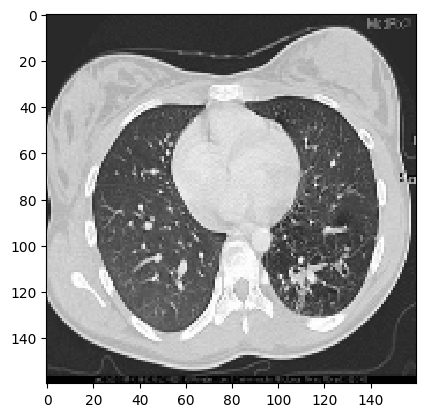

In [3]:
validation_dir = os.path.join(PATH, "./test")
validation_dataset = image_dataset_from_directory(
    validation_dir, shuffle=True, batch_size=203, image_size=IMG_SIZE
)
image_batch, label_batch = validation_dataset.as_numpy_iterator().next()

print(label_batch[1])
plt.imshow(image_batch[1].astype(np.uint8))
plt.show()

In [4]:
def predict_by_one(input_img_fl32):
    predictions = model.predict(input_img_fl32[np.newaxis, :, :, :])
    predictions = tf.nn.sigmoid(predictions)
    predictions = tf.where(predictions < 0.5, 0, 1)
    return predictions.numpy()


def predict_by_one_tflite(input_img_fl32):
#     input_shape = input_details[0]["shape"]
    interpreter.set_tensor(
        input_details[0]["index"], input_img_fl32[np.newaxis, :, :, :]
    )
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]["index"])
    predictions = tf.nn.sigmoid(output_data)
    predictions = tf.where(predictions < 0.5, 0, 1)
    return predictions.numpy()

In [5]:
import time

In [6]:
count=0
for i in range(len(label_batch)):
    before = time.time()
    prediction = predict_by_one(image_batch[i])[0][0]
    in_ms_inf = time.time() - before
    print(in_ms_inf)
    if prediction == label_batch[i]:
        count+=1
        print(count)
#     print(predict_by_one(image_batch[i])[0][0])
#     print(label_batch[i])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1.3085861206054688
0.07136201858520508
1
0.07618522644042969
2
0.07537841796875
3
0.06949830055236816
4
0.07261228561401367
0.07854390144348145
5
0.07477498054504395
0.07196998596191406
6
0.11001110076904297
7
0.08386778831481934
8
0.0751643180847168
9
0.07371830940246582
10
0.07033491134643555
11
0.07001829147338867
0.07140493392944336
12
0.07259583473205566
13
0.07295083999

In [7]:
print("accuracy: ", (count/len(label_batch))*100)

accuracy:  73.89162561576354


In [8]:
interpreter = tf.lite.Interpreter(model_path="./ResNet101_batch32.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


# print(output_data)

In [9]:
count=0
for i in range(len(label_batch)):
    before = time.time()
    prediction = predict_by_one_tflite(image_batch[i])[0][0]
    in_ms_inf = time.time() - before
    print(in_ms_inf)
    if prediction == label_batch[i]:
        count+=1
        print(count)
#     print(predict_by_one(image_batch[i])[0][0])
#     print(label_batch[i])

10.885143756866455
8.752082109451294
1
8.705421447753906
2
9.05000901222229
3
8.84456729888916
4
9.102452039718628
8.906668186187744
5
8.857974529266357
9.322909116744995
6
9.078823328018188
7
8.581624269485474
8
8.73863935470581
9
9.090811491012573
10
8.92494511604309
11
9.046227931976318
9.460659265518188
12
9.39532995223999
13
8.873353719711304
14
8.774587631225586
15
9.542179584503174
16
9.551857471466064
17
9.096806049346924
18
8.961503267288208
19
8.888527631759644
20
8.997505903244019
9.050646305084229
21
8.68282961845398
22
8.839850425720215
23
8.867205381393433
8.829864025115967
24
8.805205345153809
25
9.10212254524231
26
8.654417514801025
27
8.513973712921143
8.563966035842896
28
8.554862260818481
8.863142728805542
8.642298221588135
8.440077304840088
8.714128494262695
29
8.925820350646973
30
8.497413396835327
31
9.089493036270142
8.543978929519653
32
8.956102848052979
8.489464521408081
33
8.483885049819946
34
8.660078287124634
35
8.966352701187134
36
8.59570574760437
37
8.621

In [10]:
print("accuracy: ", (count/len(label_batch))*100)

accuracy:  74.8768472906404
